<a href="https://colab.research.google.com/github/Praneeth2002/Market-Segmentation/blob/main/market_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [109]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [110]:
from google.colab import files
import io
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['mcdonalds.csv']))

Saving mcdonalds.csv to mcdonalds (2).csv


In [111]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [113]:
df.describe()

,Age
count,1453.000000
mean,44.604955
std,14.221178
min,18.000000
25%,33.000000
50%,45.000000
75%,57.000000
max,71.000000


In [114]:
df.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [115]:
for i in df.columns:
  print(df[i].unique())

['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['No' 'Yes']
['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']
[61 51 62 69 49 55 56 23 58 32 53 28 65 54 67 34 31 47 37 41 36 50 39 35
 20 24 44 40 48 38 57 60 66 42 26 52 29 25 22 45 18 68 43 21 27 33 63 46
 59 19 64 70 30 71]
['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']
['Female' 'Male']


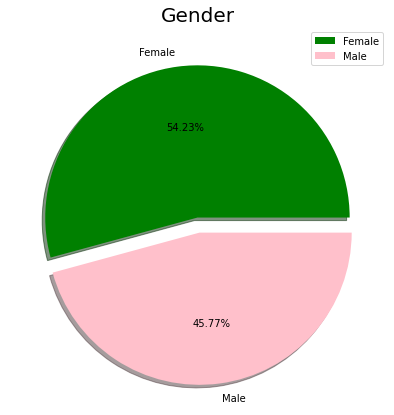

In [116]:
#EXPLORING df

#Customer segmentation - based on socio-demographs (Age & Gender)

#Gender
labels = ['Female', 'Male']
size = df['Gender'].value_counts()
colors = ['green', 'pink']
explode = [0, 0.1]
plt.rcParams['figure.figsize'] = (7, 7)
plt.pie(size, colors = colors, explode = explode, labels = labels, shadow = True, autopct = '%.2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')
plt.legend()
plt.show()
#we infer that there are more female customers than male.



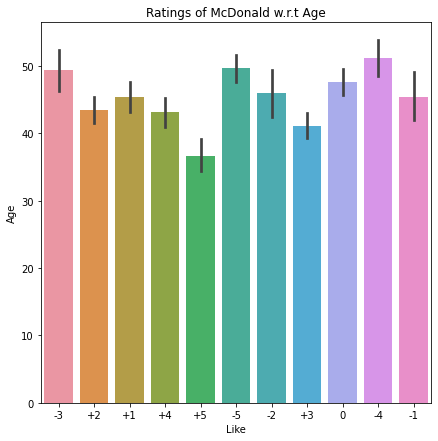

In [117]:
#Customer segmentation - based on pyschographic segmentation

#For convinence renaming the category
df['Like']= df['Like'].replace({'I hate it!-5': '-5','I love it!+5':'+5'})
#Like 
sns.barplot(x="Like", y="Age",data=df)
plt.title('Ratings of McDonald w.r.t Age')
plt.show()

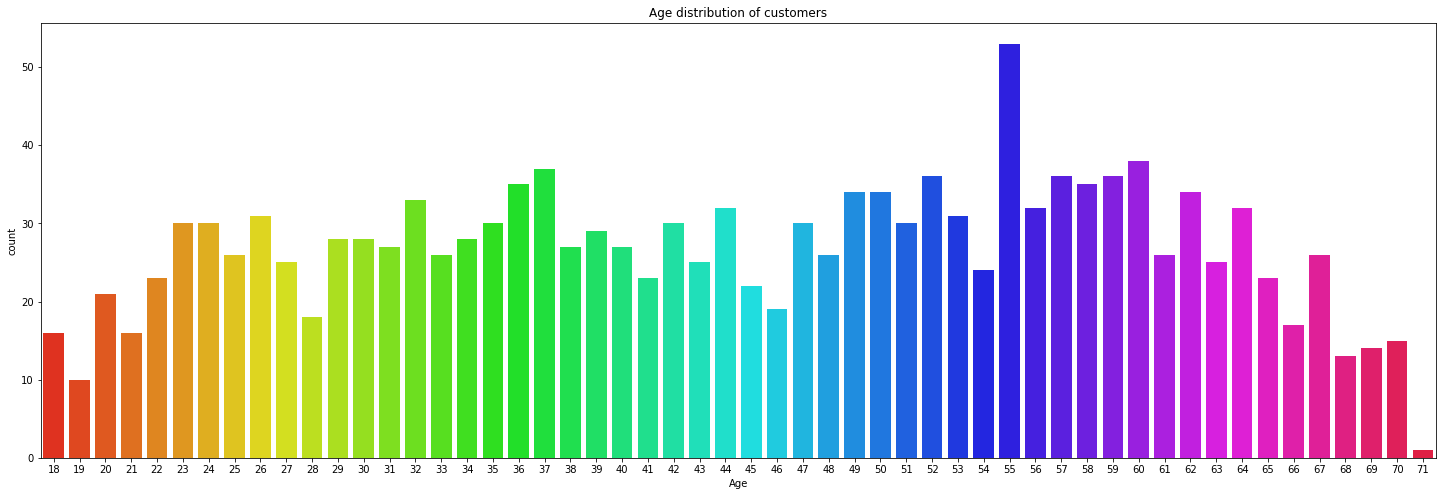

In [118]:
#Age
plt.rcParams['figure.figsize'] = (25, 8)
f = sns.countplot(x=df['Age'],palette = 'hsv')
plt.title('Age distribution of customers')
plt.show()
# Mcdonalds recieve more customers of age between 50-60 and 35-40.

In [119]:
print(df['Gender'].value_counts())
print(df['VisitFrequency'].value_counts())

Female    788
Male      665
Name: Gender, dtype: int64
Once a month             439
Every three months       342
Once a year              252
Once a week              235
Never                    131
More than once a week     54
Name: VisitFrequency, dtype: int64


In [120]:
df_never = df.loc[df['VisitFrequency']=='Never']
df_never.head()
k = df_never['Age'].tolist()
d = {20:0,30:0,40:0,50:0,60:0,70:0}
for i in k:
  if(i<=20):
    d[20]+=1
  elif(i<=30):
    d[30]+=1
  elif(i<=40):
    d[40]+=1
  elif(i<=50):
    d[50]+=1
  elif(i<=60):
    d[60]+=1
  else:
    d[70]+=1
print(d)

{20: 3, 30: 12, 40: 18, 50: 16, 60: 45, 70: 37}


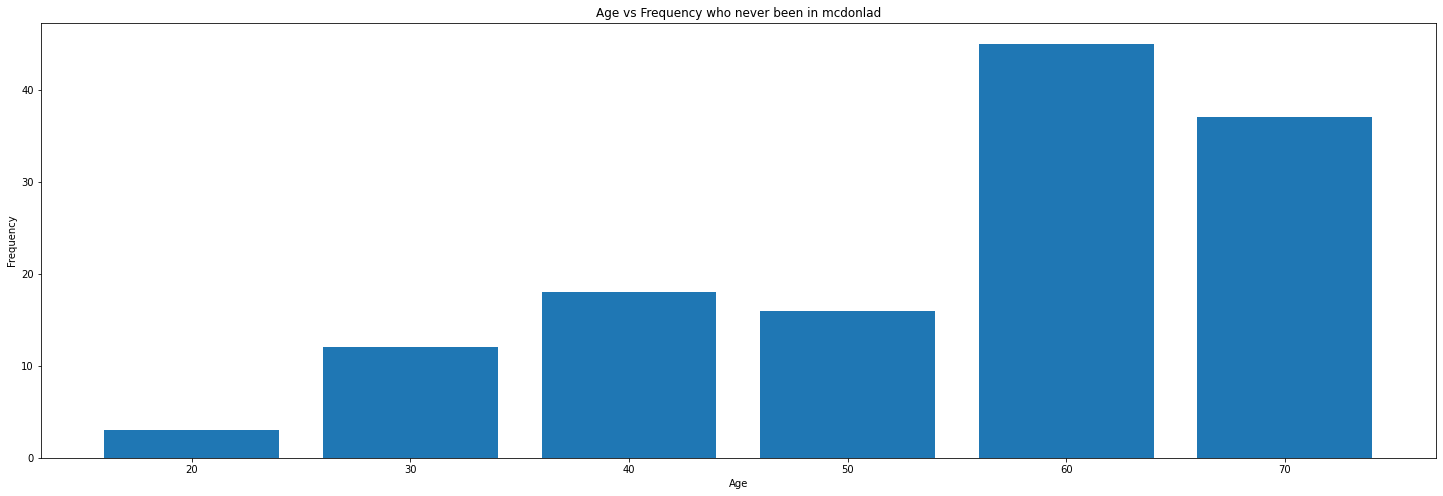

In [121]:
names = list(d.keys())
values = list(d.values())
plt.bar(range(len(d)), values, tick_label=names)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age vs Frequency who never been in mcdonlad")
plt.rcParams['figure.figsize'] = (7,7)
plt.show()

In [122]:
df_have = df.loc[df['VisitFrequency']!='Never']
df_have.head()
k = df_have['Age'].tolist()
d1 = {20:0,30:0,40:0,50:0,60:0,70:0}
for i in k:
  if(i<=20):
    d1[20]+=1
  elif(i<=30):
    d1[30]+=1
  elif(i<=40):
    d1[40]+=1
  elif(i<=50):
    d1[50]+=1
  elif(i<=60):
    d1[60]+=1
  else:
    d1[70]+=1
print(d1)

{20: 44, 30: 243, 40: 281, 50: 259, 60: 306, 70: 189}


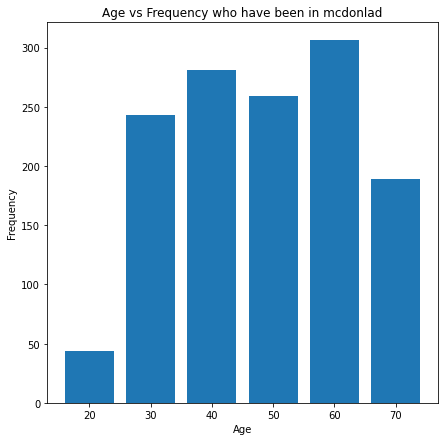

In [123]:
names = list(d1.keys())
values = list(d1.values())
plt.bar(range(len(d1)), values, tick_label=names)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Age vs Frequency who have been in mcdonlad")
plt.rcParams['figure.figsize'] = (7,7)
plt.show()

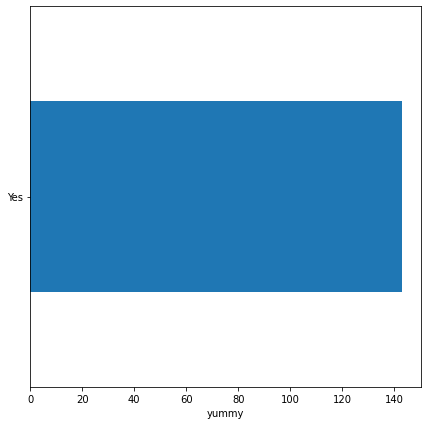

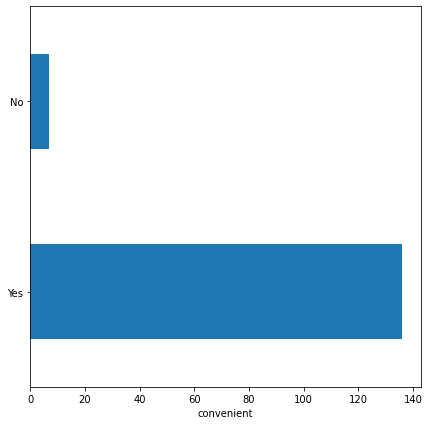

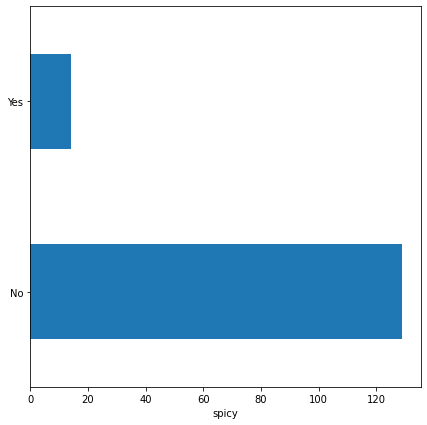

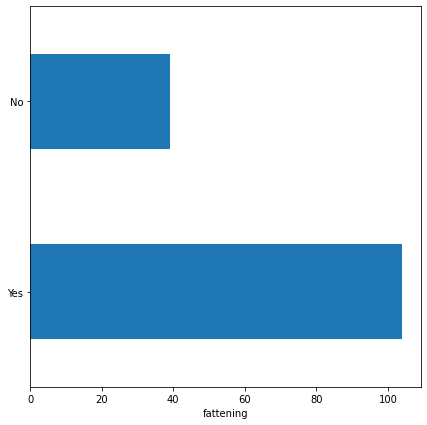

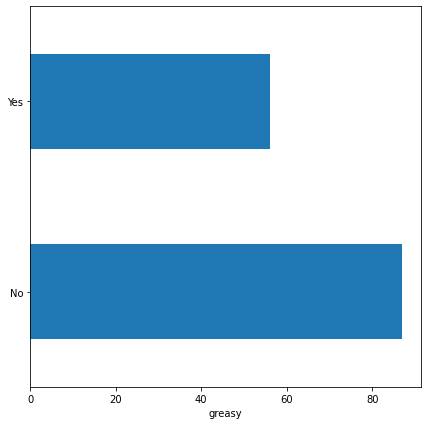

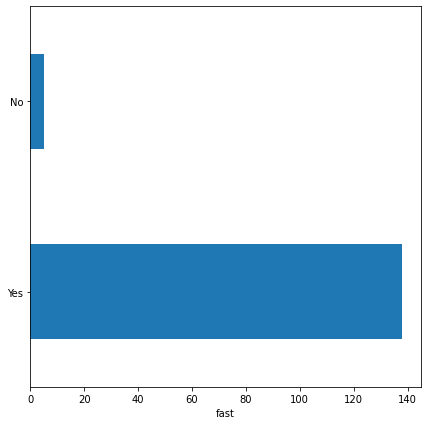

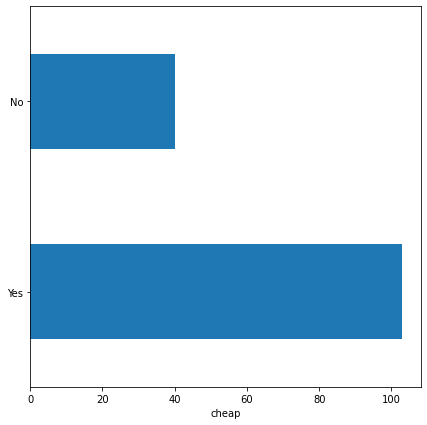

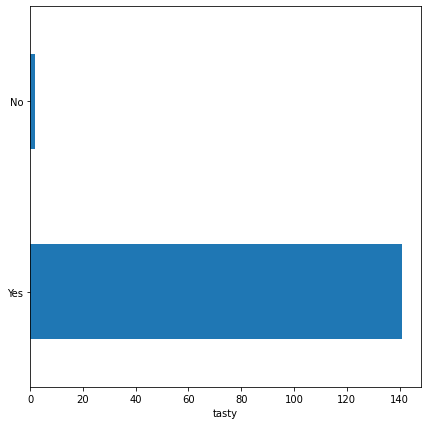

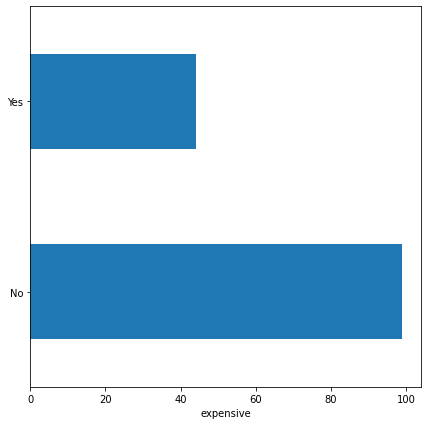

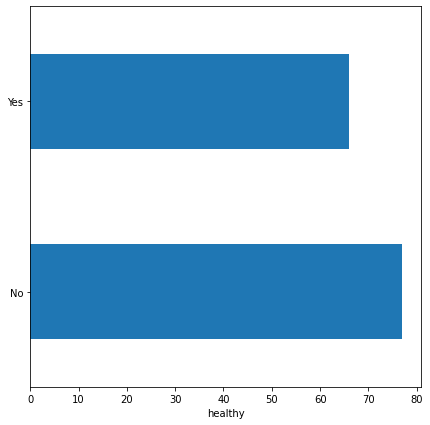

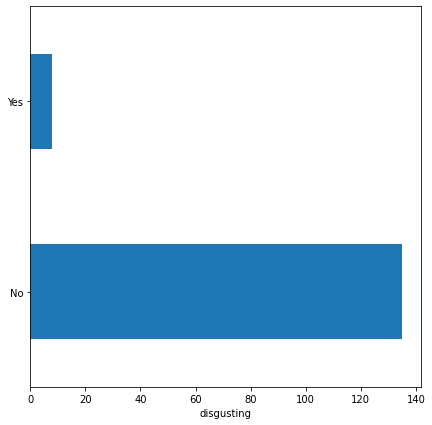

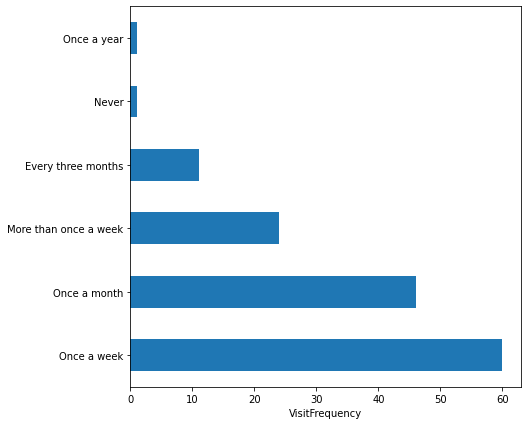

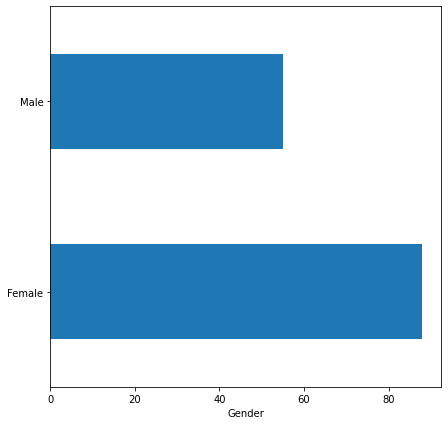

In [124]:
df_like_5 = df.loc[df['Like']=='+5']
#print(df_like_5.columns)
for i in df_like_5.columns:
  if(i!='Age' and i!='Like'):
    ax = df_like_5[i].value_counts().plot(kind='barh')
    plt.rcParams['figure.figsize'] = (7,7)
    plt.xlabel(i)
    plt.show()

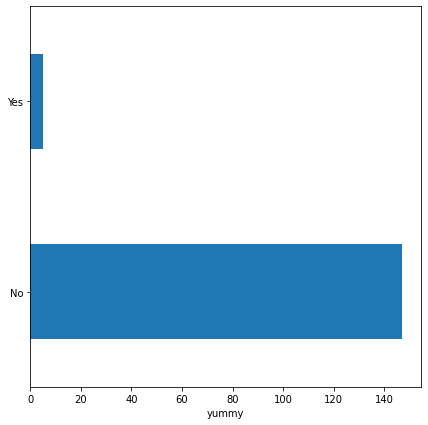

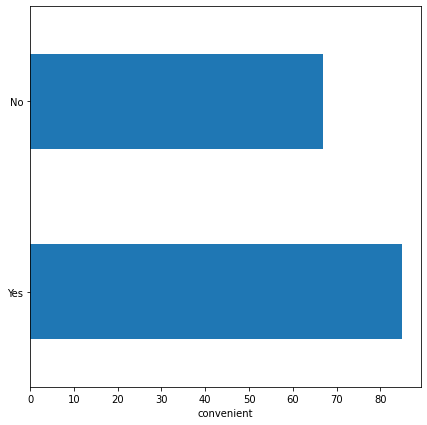

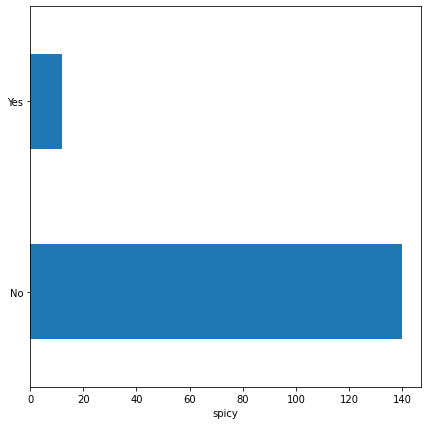

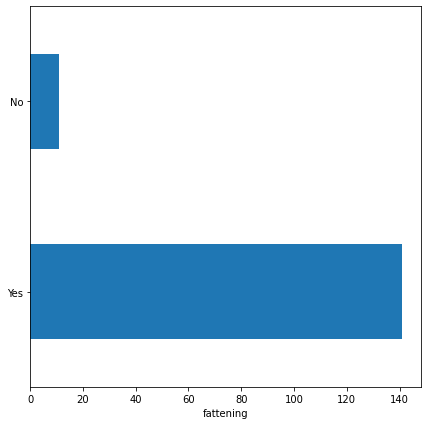

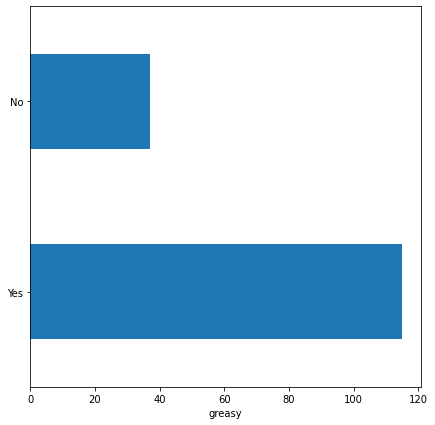

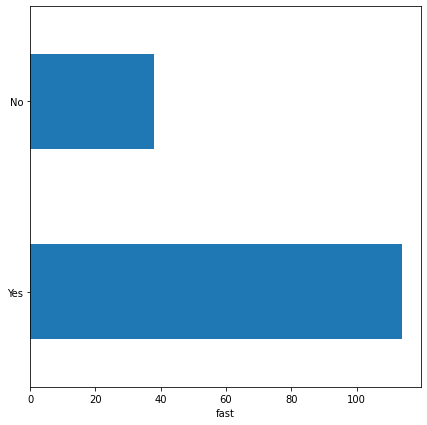

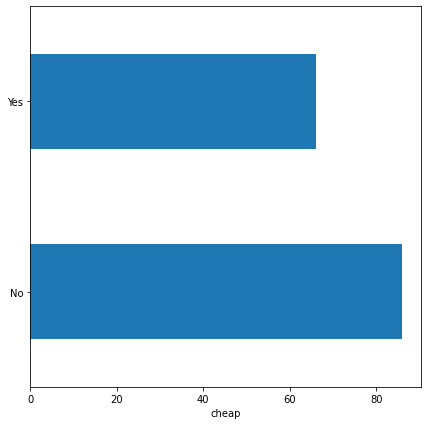

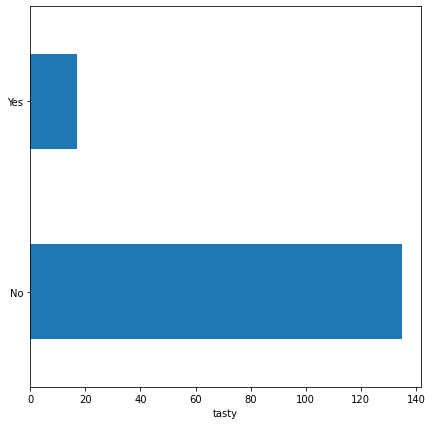

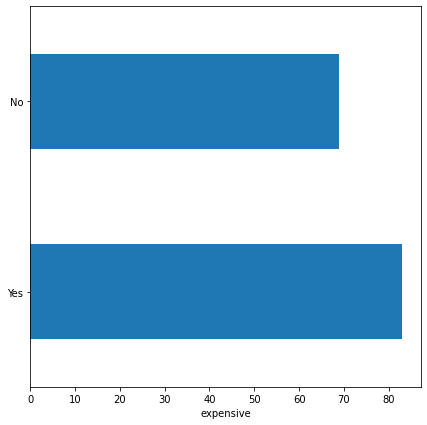

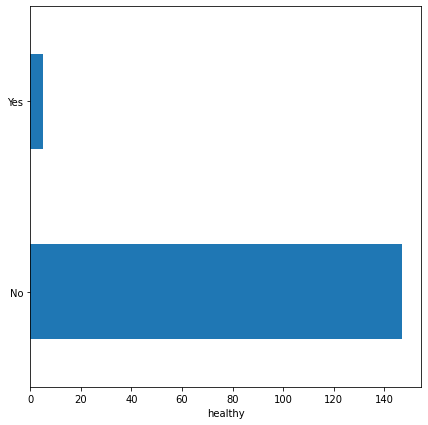

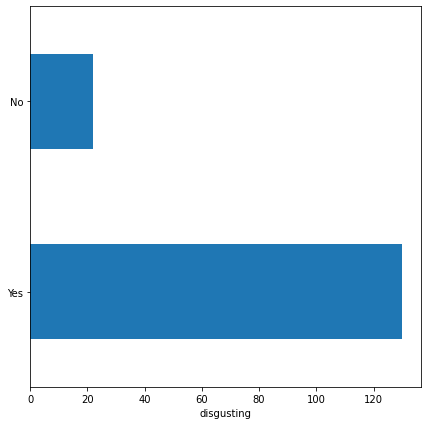

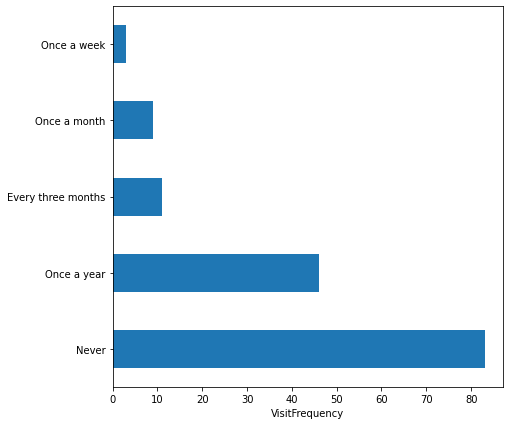

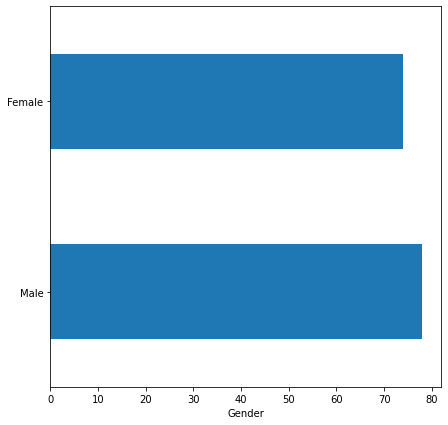

In [125]:
df_like__5 = df.loc[df['Like']=='-5']
#print(df_like_5.columns)
for i in df_like__5.columns:
  if(i!='Age' and i!='Like'):
    ax = df_like__5[i].value_counts().plot(kind='barh')
    plt.rcParams['figure.figsize'] = (7,7)
    plt.xlabel(i)
    plt.show()

In [126]:
encode = {'Yes':1, 'No':0}
encode1 = {'Male':1, 'Female':2}
encode2 = {'Every three months':3,'Once a year':4,'Once a month':5,'Once a week':6,'More than once a week':7,'Never':8}
encode3 = {'-4':-4,'-3':-3,'-2':-2,'-1':-1,'0':0,'+1':1,'+2':2,'+3':3,'+4':4,'+5':5,'-5':-5}
df["yummy"] = df.yummy.map(encode)
df["convenient"] = df.convenient.map(encode)
df["spicy"] = df.spicy.map(encode)
df["fattening"] = df.fattening.map(encode)
df["greasy"] = df.greasy.map(encode)
df["fast"] = df.fast.map(encode)
df["cheap"] = df.cheap.map(encode)
df["tasty"] = df.tasty.map(encode)
df["expensive"] = df.expensive.map(encode)
df["healthy"] = df.healthy.map(encode)
df["disgusting"] = df.disgusting.map(encode)
df["Like"] = df.Like.map(encode3)

df["VisitFrequency"] = df.VisitFrequency.map(encode2)
df["Gender"] = df.Gender.map(encode1)
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,3,2
1,1,1,0,1,1,1,1,1,1,0,0,2,51,3,2
2,0,1,1,1,1,1,0,1,1,1,0,1,62,3,2
3,1,1,0,1,1,1,1,1,0,0,1,4,69,6,2
4,0,1,0,1,1,1,1,0,0,1,0,2,49,5,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f85be55e5d0>,
      dtype=object)

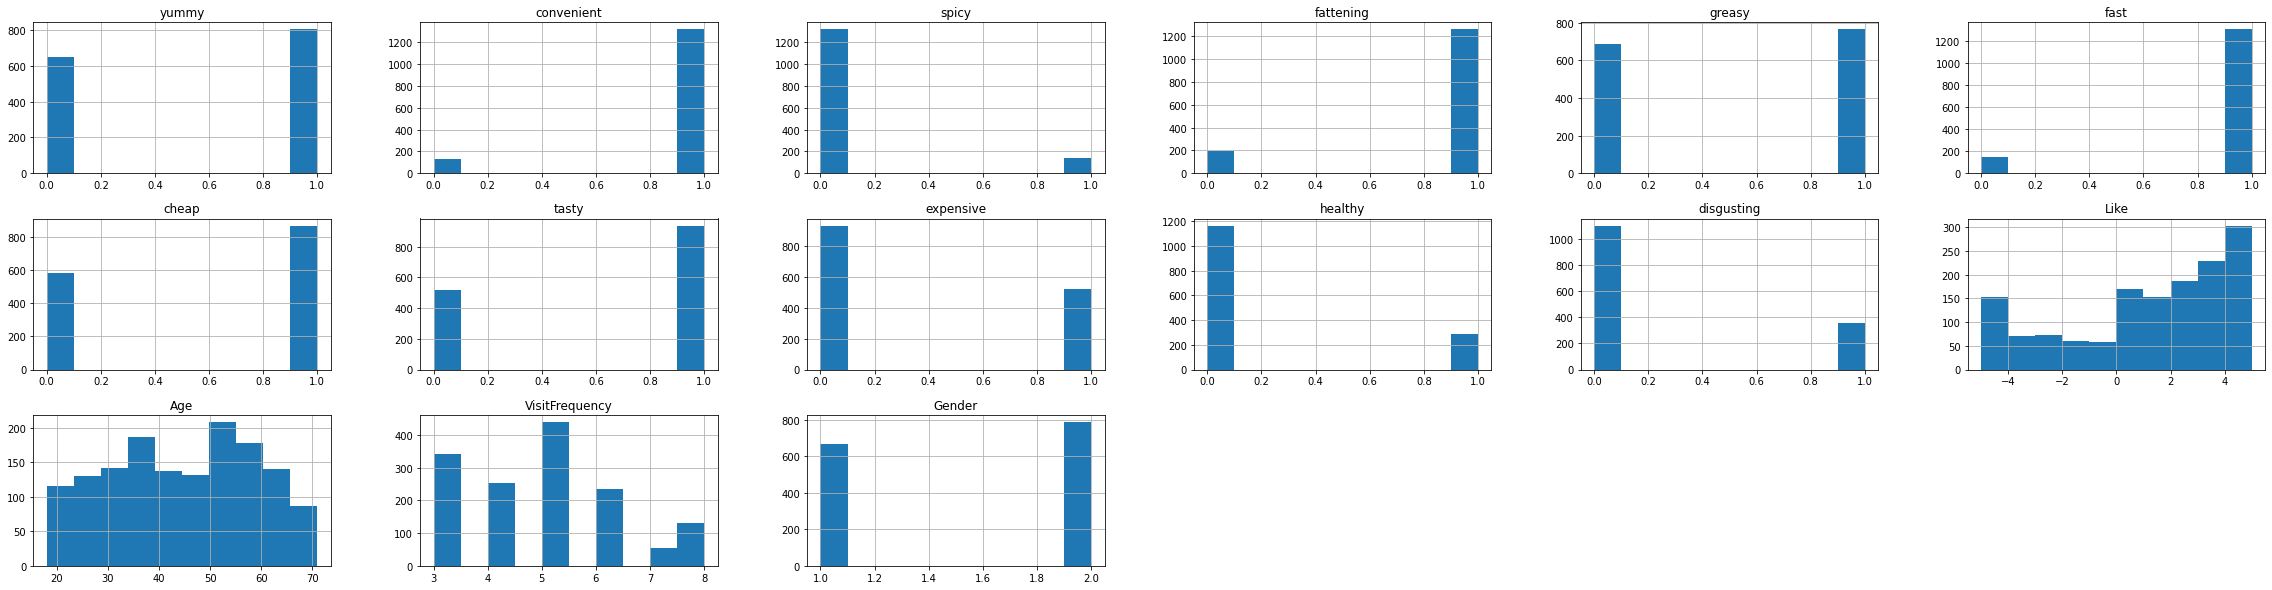

In [127]:
df.hist(layout=(3,6), figsize=(40,10))

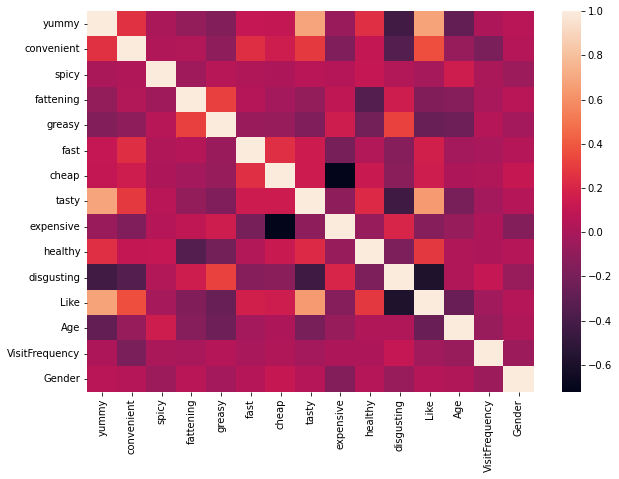

In [128]:
corr=df.corr()
plt.figure(1, figsize=(10,7))
sns.heatmap(corr)

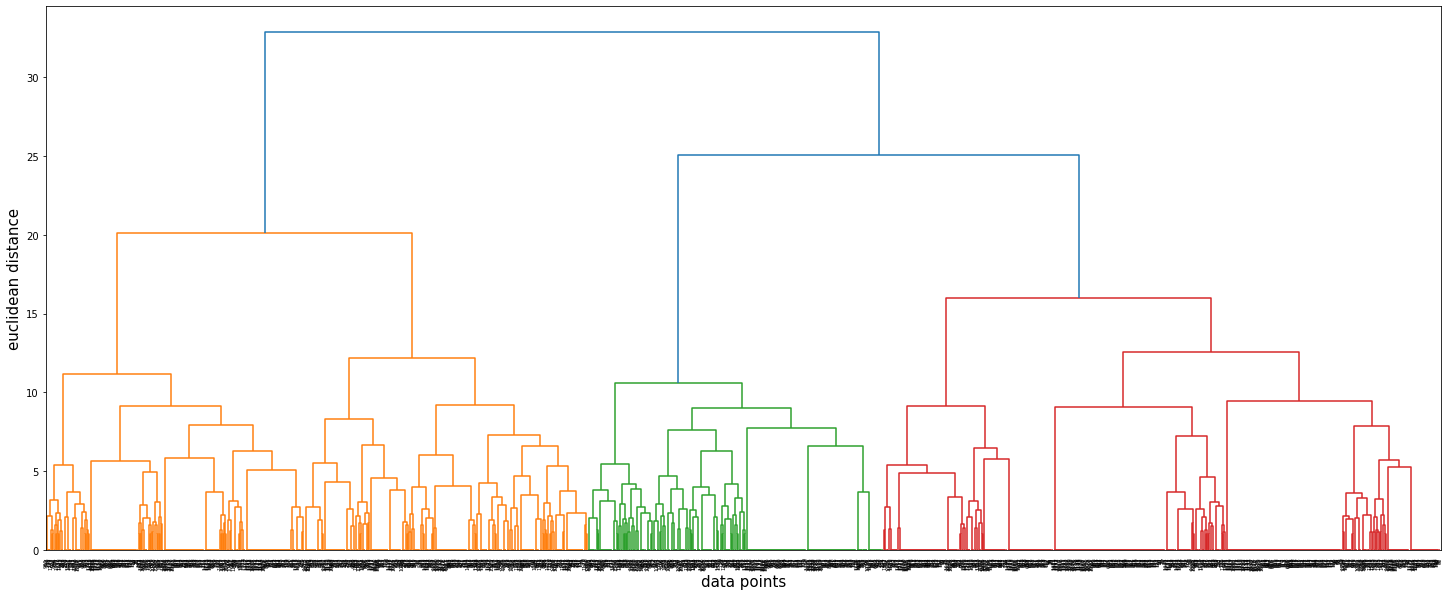

In [129]:
# Hierarchical Clustering Algorithm
# Create demogram and find the best clustering value
from scipy.cluster.hierarchy import linkage, dendrogram

merg = linkage(df.iloc[:,:11], method='ward',metric='euclidean')
plt.rcParams['figure.figsize'] = (25,10)
dendrogram(merg,leaf_rotation = 90)
plt.xlabel("data points", fontsize = 15)
plt.ylabel("euclidean distance", fontsize=15)
plt.show()

In [150]:
from sklearn.cluster import AgglomerativeClustering

clustering_model = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
clustering_model.fit(df.iloc[:50,:])
clustering_model.labels_

array([2, 0, 2, 2, 0, 0, 0, 3, 0, 1, 0, 1, 2, 0, 2, 0, 1, 1, 0, 4, 4, 4,
       3, 0, 4, 1, 3, 1, 0, 3, 4, 4, 0, 1, 0, 0, 4, 0, 1, 0, 1, 0, 2, 4,
       0, 4, 0, 2, 1, 2])

Text(0.5, 1.0, 'Labeled Customer Data')

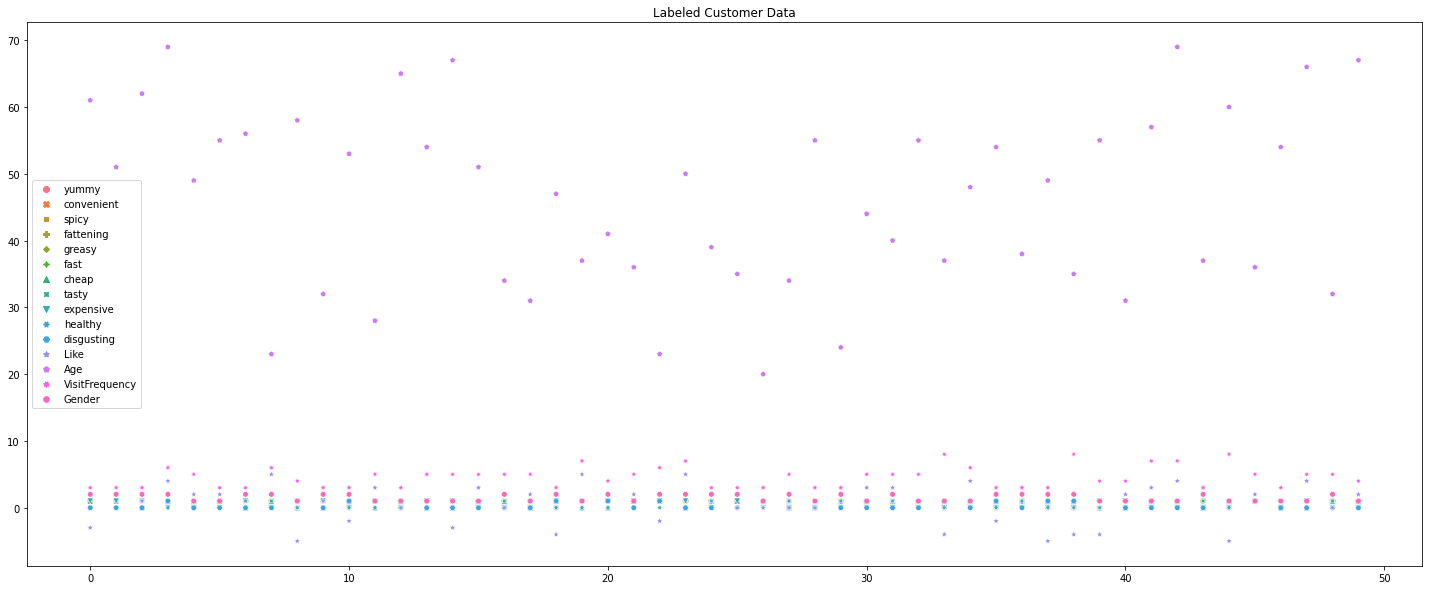

In [151]:
data_labels = clustering_model.labels_
plt.rcParams['figure.figsize'] = (7,7)
sns.scatterplot(data=df.iloc[:50,:]).set_title('Labeled Customer Data')

In [131]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,-3,61,3,2
1,1,1,0,1,1,1,1,1,1,0,0,2,51,3,2
2,0,1,1,1,1,1,0,1,1,1,0,1,62,3,2
3,1,1,0,1,1,1,1,1,0,0,1,4,69,6,2
4,0,1,0,1,1,1,1,0,0,1,0,2,49,5,1


In [132]:
df.loc[df['cheap'] == '', 'cheap'] = 0
df['cheap']=df['cheap'].astype(float)

In [133]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
normalized_data= scaler.fit_transform(df)
normalized_data

array([[-1.11147857,  0.31873518, -0.32134871, ...,  1.15325815,
        -1.25054837,  0.918645  ],
       [ 0.89970246,  0.31873518, -0.32134871, ...,  0.44983942,
        -1.25054837,  0.918645  ],
       [-1.11147857,  0.31873518,  3.11188424, ...,  1.22360002,
        -1.25054837,  0.918645  ],
       ...,
       [ 0.89970246,  0.31873518, -0.32134871, ...,  0.5201813 ,
         0.09242782,  0.918645  ],
       [ 0.89970246,  0.31873518, -0.32134871, ..., -0.2535793 ,
        -1.25054837, -1.08855979],
       [-1.11147857,  0.31873518, -0.32134871, ..., -1.0273399 ,
        -1.25054837, -1.08855979]])

In [134]:
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.cluster import KMeans
wcss_values = []
for i in range(1,20):
  kmeans = KMeans(n_clusters=i, init='k-means++')
  kmeans.fit(normalized_data)
  wcss_values.append(kmeans.inertia_)

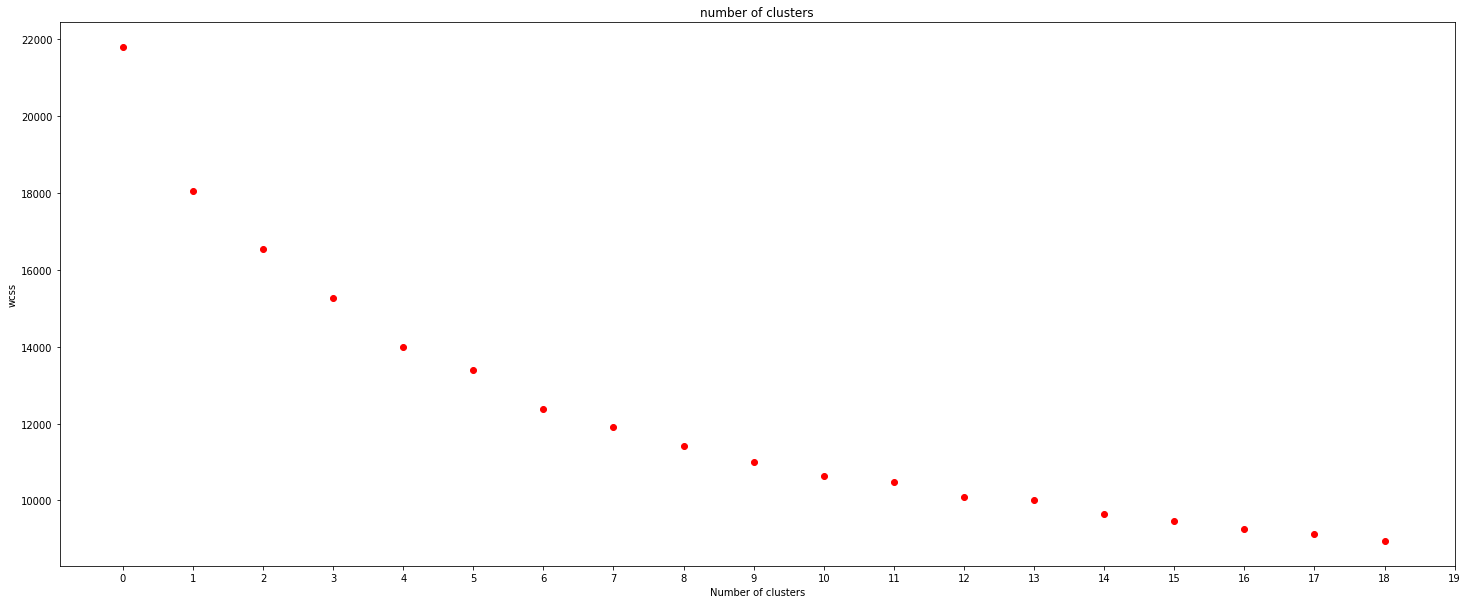

In [137]:
plt.plot(wcss_values,'ro')
plt.xlabel('Number of clusters')
plt.ylabel('wcss')
plt.rcParams['figure.figsize'] = (7,7)
plt.title('number of clusters')
plt.xticks(ticks=range(0,20))
plt.show()

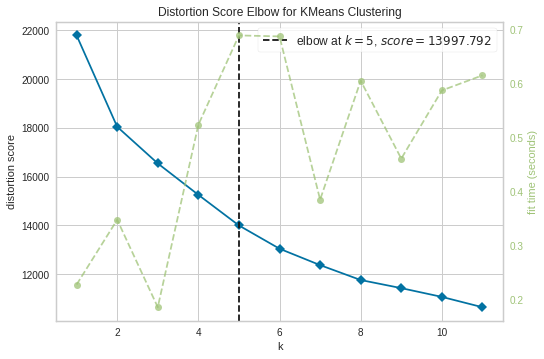

In [155]:
# Using k-means clustering analysis
from sklearn.utils.metaestimators import available_if
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(normalized_data)
visualizer.show();

In [156]:
# K-means Clustering 

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0).fit(normalized_data)
df['cluster_num'] = kmeans.labels_ # Adding to df
print (kmeans.labels_) # Label assigned for each data point
print (kmeans.inertia_) # Gives within-cluster sum of squares. 
print(kmeans.n_iter_) # Number of iterations that k-means algorithm runs to get a minimum within-cluster sum of squares
print(kmeans.cluster_centers_) # Location of the centroids on each cluster.


[2 1 1 ... 1 0 2]
13998.226076090206
10
[[ 3.84935883e-01  1.54157278e-01  1.07805405e-01 -2.55509245e+00
  -9.11417349e-01  9.46367689e-02  1.87116512e-01  3.95081059e-01
  -3.11961196e-01  1.06746324e+00 -4.97091075e-01  6.38957433e-01
   3.92477301e-01 -4.74655353e-02 -1.20800337e-01]
 [ 5.89760174e-01  2.35882606e-01  1.25441876e-01  3.61103343e-01
   2.00712885e-01 -1.46941889e-01 -9.63071784e-01  5.64373147e-01
   1.23947327e+00 -2.64113521e-02 -2.63041514e-01  4.47472064e-01
  -3.88963320e-01 -5.24480382e-02 -1.67445262e-01]
 [-1.04991181e+00  3.18735180e-01 -4.10847996e-02  3.38759777e-01
   2.99467810e-01  6.91031173e-02 -1.41272274e-02 -1.08443641e+00
  -3.87889843e-02 -3.70463146e-01  5.75593073e-01 -8.65076972e-01
   3.22972831e-01 -1.43963399e-01  2.08975174e-03]
 [-1.07650151e+00 -3.07729406e+00 -8.25151174e-02  7.05339530e-03
   4.43281249e-01 -9.43583710e-01 -5.29697395e-01 -1.20022474e+00
   5.77630051e-01 -3.67573400e-01  1.35973958e+00 -1.48851918e+00
   3.47079122e-

In [157]:
df

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender,cluster_num
0,0,1,0,1,0,1,1.0,0,1,0,0,-3,61,3,2,2
1,1,1,0,1,1,1,1.0,1,1,0,0,2,51,3,2,1
2,0,1,1,1,1,1,0.0,1,1,1,0,1,62,3,2,1
3,1,1,0,1,1,1,1.0,1,0,0,1,4,69,6,2,4
4,0,1,0,1,1,1,1.0,0,0,1,0,2,49,5,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0.0,0,1,0,1,-5,47,4,1,2
1449,1,1,0,1,0,0,1.0,1,0,1,0,2,36,6,2,4
1450,1,1,0,1,0,1,0.0,1,1,0,0,3,52,5,2,1
1451,1,1,0,0,0,1,1.0,1,0,1,0,4,41,3,1,0


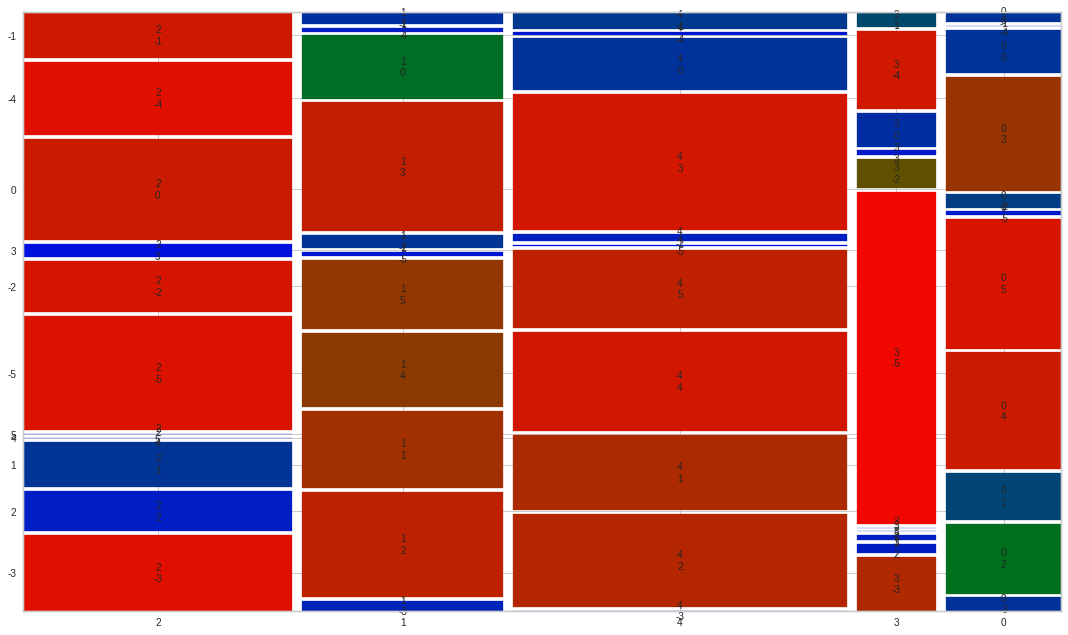

In [159]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams["figure.figsize"] = [15, 9]
plt.rcParams["figure.autolayout"] = True
mosaic(df, ['cluster_num', 'Like'], gap=0.01,statistic = True)
plt.show()

In [169]:
df_new = df.iloc[:,:11]
df_new

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting
0,0,1,0,1,0,1,1.0,0,1,0,0
1,1,1,0,1,1,1,1.0,1,1,0,0
2,0,1,1,1,1,1,0.0,1,1,1,0
3,1,1,0,1,1,1,1.0,1,0,0,1
4,0,1,0,1,1,1,1.0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0.0,0,1,0,1
1449,1,1,0,1,0,0,1.0,1,0,1,0
1450,1,1,0,1,0,1,0.0,1,1,0,0
1451,1,1,0,0,0,1,1.0,1,0,1,0


In [170]:
 #Principal component analysis

from sklearn.decomposition import PCA
from sklearn import preprocessing

pca_data = preprocessing.scale(df_new)

pca = PCA(n_components=11)
pc = pca.fit_transform(df_new)
names = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11']
pf = pd.DataFrame(data = pc, columns = names)
pf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
0,0.425367,-0.219079,0.663255,-0.401300,0.201705,-0.389767,-0.211982,0.163235,0.181007,0.515706,-0.567074
1,-0.218638,0.388190,-0.730827,-0.094724,0.044669,-0.086596,-0.095877,-0.034756,0.111476,0.493313,-0.500440
2,0.375415,0.730435,-0.122040,0.692262,0.839643,-0.687406,0.583112,0.364379,-0.322288,0.061759,0.242741
3,-0.172926,-0.352752,-0.843795,0.206998,-0.681415,-0.036133,-0.054284,-0.231477,-0.028003,-0.250678,-0.051034
4,0.187057,-0.807610,0.028537,0.548332,0.854074,-0.097305,-0.457043,0.171758,-0.074409,0.031897,0.082245
...,...,...,...,...,...,...,...,...,...,...,...
1448,1.550242,0.275031,-0.013737,0.200604,-0.145063,0.306575,-0.075308,0.345552,-0.136589,-0.432798,-0.456076
1449,-0.957339,0.014308,0.303843,0.444350,-0.133690,0.381804,-0.326432,0.878047,-0.304441,-0.247443,-0.193671
1450,-0.185894,1.062662,0.220857,-0.467643,-0.187757,-0.192703,-0.091597,-0.036576,0.038255,0.056518,-0.012800
1451,-1.182064,-0.038570,0.561561,0.701126,0.047645,0.193687,-0.027335,-0.339374,0.022267,-0.002573,-0.105316


In [171]:
 #Proportion of Variance (from PC1 to PC11)
pca.explained_variance_ratio_

array([0.29944723, 0.19279721, 0.13304535, 0.08309578, 0.05948052,
       0.05029956, 0.0438491 , 0.03954779, 0.0367609 , 0.03235329,
       0.02932326])

In [172]:
np.cumsum(pca.explained_variance_ratio_)

array([0.29944723, 0.49224445, 0.6252898 , 0.70838558, 0.7678661 ,
       0.81816566, 0.86201476, 0.90156255, 0.93832345, 0.97067674,
       1.        ])

In [174]:
# correlation coefficient between original variables and the component

loadings = pca.components_
num_pc = pca.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = df_new.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
variable,,,,,,,,,,,
yummy,-0.476933,0.363790,-0.304444,0.055162,-0.307535,0.170738,-0.280519,0.013041,0.572403,-0.110284,0.045439
convenient,-0.155332,0.016414,-0.062515,-0.142425,0.277608,-0.347830,-0.059738,-0.113079,-0.018465,-0.665818,-0.541616
spicy,-0.006356,0.018809,-0.037019,0.197619,0.070620,-0.355087,0.707637,0.375934,0.400280,-0.075634,0.141730
fattening,0.116232,-0.034094,-0.322359,-0.354139,-0.073405,-0.406515,-0.385943,0.589622,-0.160512,-0.005338,0.250910
greasy,0.304443,-0.063839,-0.802373,0.253960,0.361399,0.209347,0.036170,-0.138241,-0.002847,0.008707,0.001642
fast,-0.108493,-0.086972,-0.064642,-0.097363,0.107930,-0.594632,-0.086846,-0.627799,0.166197,0.239532,0.339265
cheap,-0.337186,-0.610633,-0.149310,0.118958,-0.128973,-0.103241,-0.040449,0.140060,0.076069,0.428087,-0.489283
tasty,-0.471514,0.307318,-0.287265,-0.002547,-0.210899,-0.076914,0.360453,-0.072792,-0.639086,0.079184,0.019552
expensive,0.329042,0.601286,0.024397,0.067816,-0.003125,-0.261342,-0.068385,0.029539,0.066996,0.454399,-0.490069


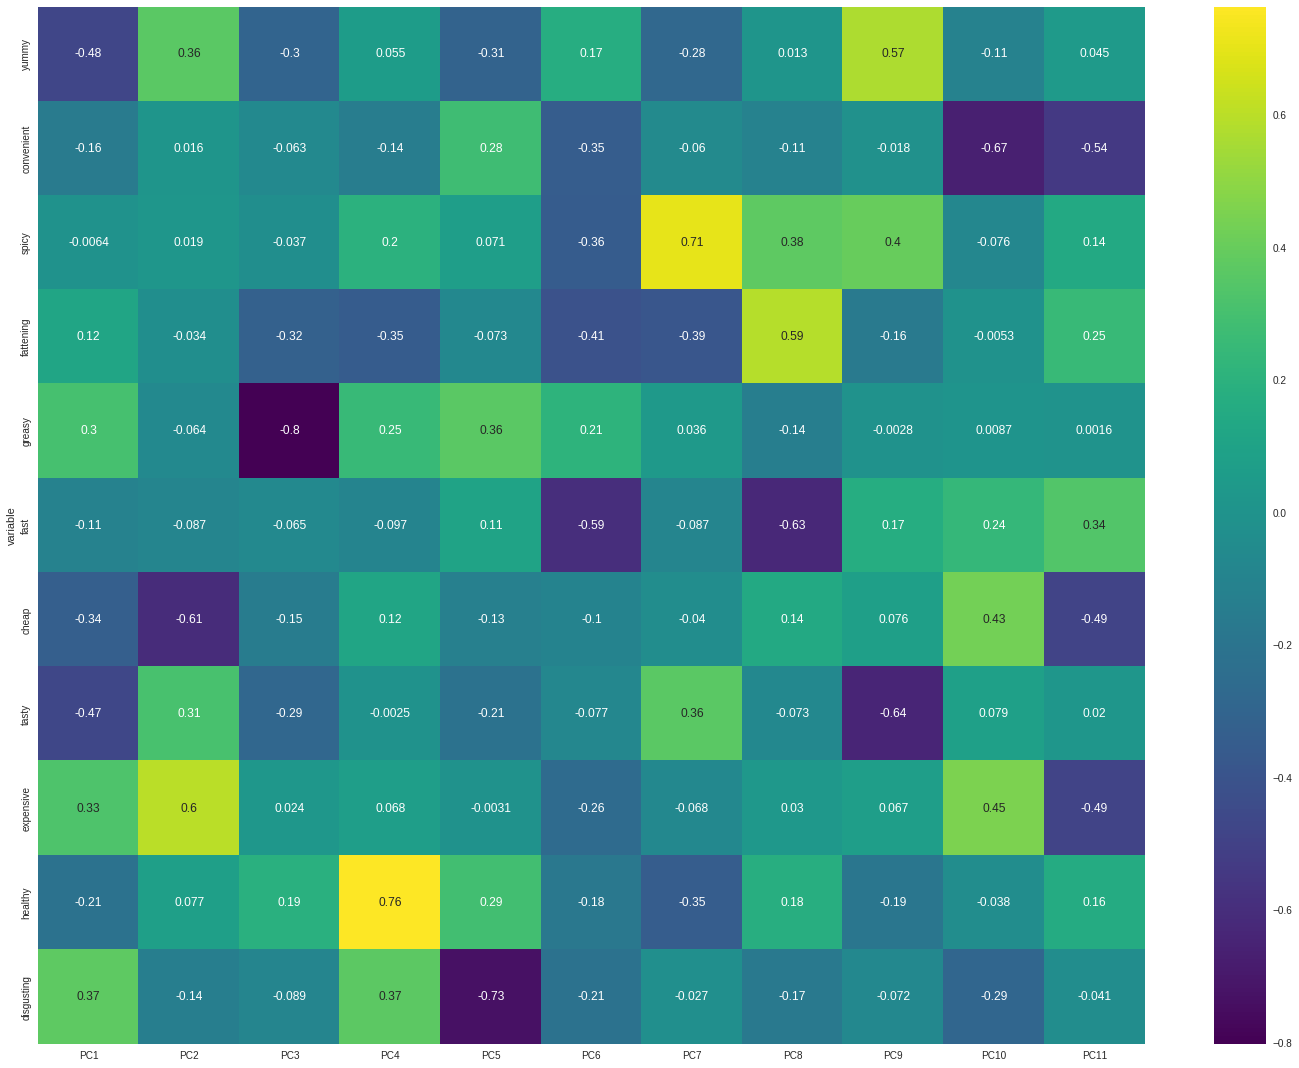

In [175]:
#Correlation matrix plot for loadings 
plt.rcParams['figure.figsize'] = (20,15)
ax = sns.heatmap(loadings_df, annot=True, cmap='viridis')
plt.show()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 84 kB 2.1 MB/s 
  Created wheel for bioinfokit: filename=bioinfokit-2.0.8-py3-none-any.whl size=56750 sha256=cb20c5ec81b693847a59dcfc9f8d6eb31f256ebaa5a2de57438a471b0125f592
  Stored in directory: /root/.cache/pip/wheels/0d/b0/a4/2be59655e33c889f2197d43e99ed077f05a6559e24ce28e21a
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7097 sha256=ea47e2822928734d685500c34cf6e47193aa085254197af1a4291fe71cec1de4
  Stored in directory: /root/.cache/pip/wheels/2f/98/32/afbf902d8f040fadfdf0a44357e4ab750afe165d873bf5893d
Successfully built bioinfokit adjustText


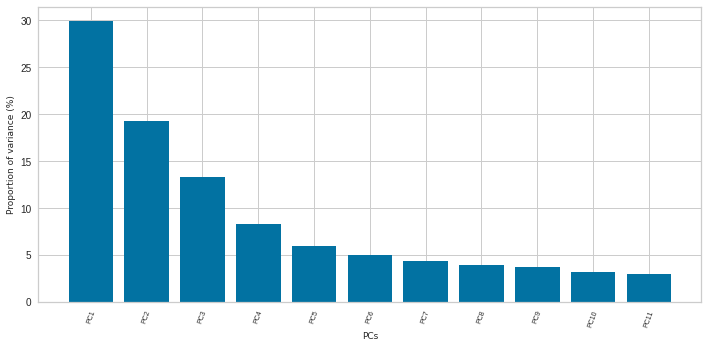

In [177]:
#Scree plot (Elbow test)- PCA
#!pip install bioinfokit
from bioinfokit.visuz import cluster
cluster.screeplot(obj=[pc_list, pca.explained_variance_ratio_],show=True,dim=(10,5))

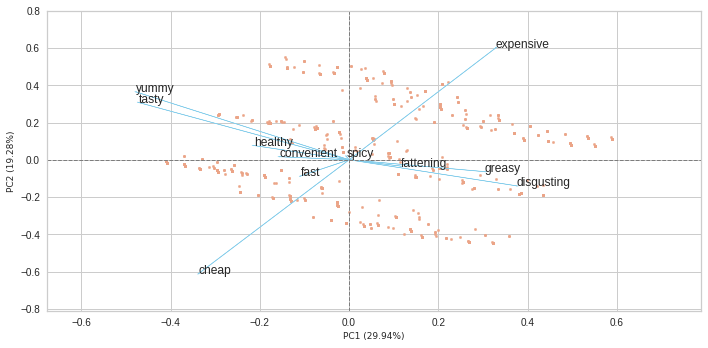

In [179]:
# get PC scores
pca_scores = PCA().fit_transform(df_new)

# get 2D biplot
cluster.biplot(cscore=pca_scores, loadings=loadings, labels=df.columns.values, var1=round(pca.explained_variance_ratio_[0]*100, 2),
    var2=round(pca.explained_variance_ratio_[1]*100, 2),show=True,dim=(10,5))

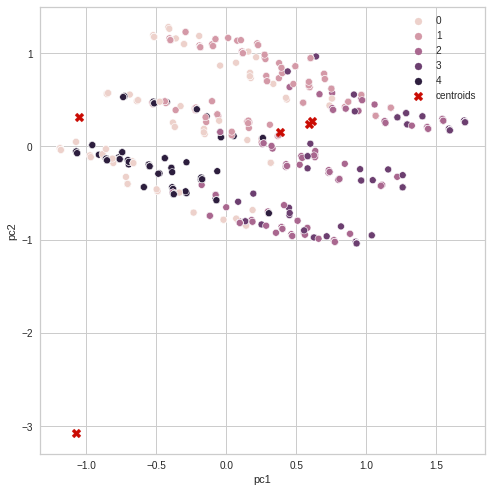

In [184]:
sns.scatterplot(data=pf, x="pc1", y="pc2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.rcParams['figure.figsize'] = (7,7)
plt.legend()
plt.show()

In [188]:
# Describing Segments

from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

crosstab =pd.crosstab(df['cluster_num'],df['Like'])
# Reordering cols
crosstab = crosstab[[-5,-4,-3,-2,-1,0,+1,+2,+3,+4,+5]]
crosstab 

Like,-5,-4,-3,-2,-1,0,1,2,3,4,5
cluster_num,,,,,,,,,,,
0,1,0,4,4,3,13,14,21,34,35,39
1,2,2,5,7,6,33,40,55,67,39,36
2,80,51,53,36,32,71,32,28,9,0,0
3,68,16,11,6,3,7,1,2,1,0,0
4,1,2,0,6,14,45,65,81,118,86,68


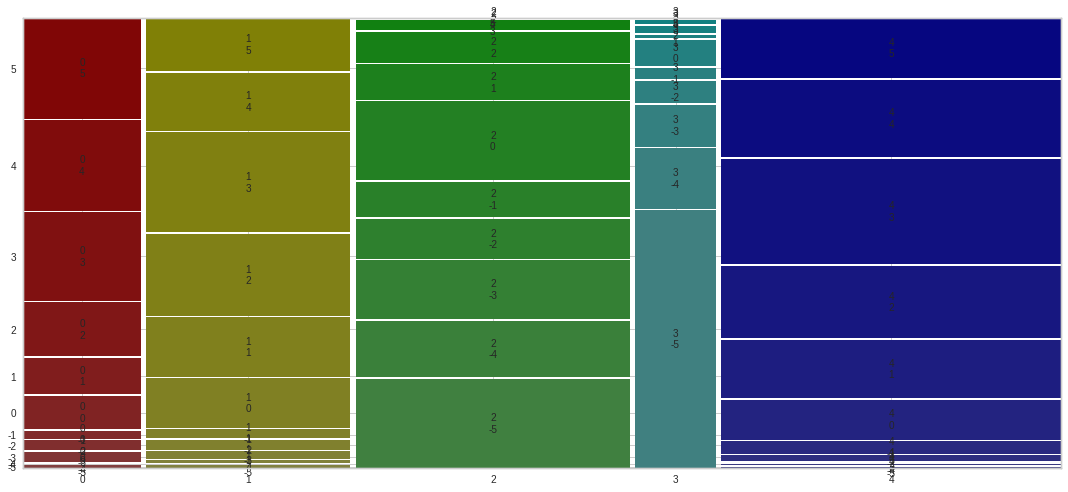

In [192]:
#MOSAIC PLOT
plt.rcParams['figure.figsize'] = (15,7)
mosaic(crosstab.stack())
plt.show()

In [193]:
#Mosaic plot gender vs segment
crosstab_gender =pd.crosstab(df['cluster_num'],df['Gender'])
crosstab_gender

Gender,1,2
cluster_num,,
0,87,81
1,158,134
2,179,213
3,63,52
4,178,308


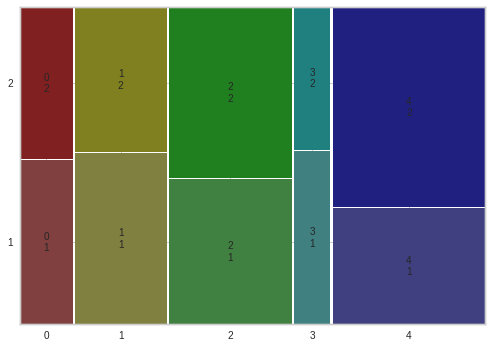

In [194]:
plt.rcParams['figure.figsize'] = (7,5)
mosaic(crosstab_gender.stack())
plt.show()

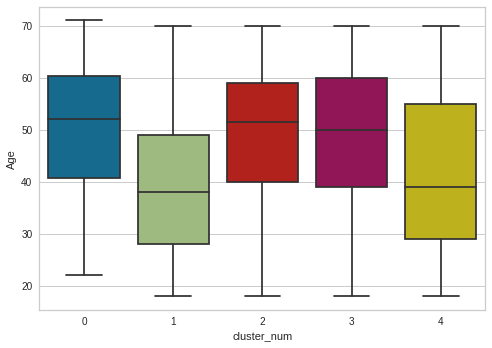

In [195]:
#box plot for age

sns.boxplot(x="cluster_num", y="Age", data=df)